# Compute performance metrics for the given Y and Y_score without sklearn

In [2]:
import numpy as np
import pandas as pd
from tqdm import tqdm
# other than these two you should not import any other packages

<pre>
<font color='red'><b>A.</b></font> Compute performance metrics for the given data <strong>5_a.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [3]:
# write your code here
data = pd.read_csv('5_a.csv')
# print(data.shape)
data['output'] = np.where(data['proba']<0.5, 0, 1)
# print(data.head())
# data.head(10000)
TP = len(data[(data['output']==1) & (data['y']==1)])
TN = len(data[(data['output']==0) & (data['y']==0)])
FP = len(data[(data['output']==1) & (data['y']==0)])
FN = len(data[(data['output']==0) & (data['y']==1)])
# print(TP)
print('TP: {}; TN:{}; FP:{}; FN:{}'.format(TP,TN,FP,FN))

precision = TP/(TP + FP)
recall = TP/(TP + FN)
print("Precision : {} Recall:{}".format(precision,recall))

f1_score = 2*precision*recall/(precision + recall)
print("F1 Score: ",f1_score)

accuracy = (TP+TN)/(TP+TN+FP+FN)
print("Accuracy: ",accuracy)

TP: 10000; TN:0; FP:100; FN:0
Precision : 0.9900990099009901 Recall:1.0
F1 Score:  0.9950248756218906
Accuracy:  0.9900990099009901


In [4]:
# Computing AUC Score
n = 10
Size = data.shape[0]
Threshold_values = set(data['proba'].tolist())
Threshold_values = sorted(Threshold_values)

tpr = []
fpr = []

for thres in tqdm(Threshold_values):
    TP = len(data[(np.where(data['proba']<thres, 0, 1)==1) & (data['y']==1)])
    TN = len(data[(np.where(data['proba']<thres, 0, 1)==0) & (data['y']==0)])
    FP = len(data[(np.where(data['proba']<thres, 0, 1)==1) & (data['y']==0)])
    FN = len(data[(np.where(data['proba']<thres, 0, 1)==0) & (data['y']==1)])

    tpr.append(TP/(TP + FN))
    fpr.append(FP/(FP + TN))

100%|██████████| 10100/10100 [01:35<00:00, 106.30it/s]


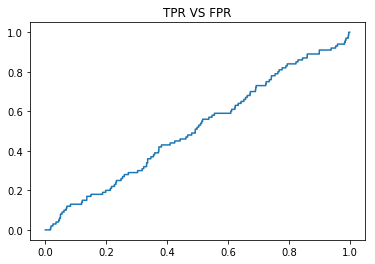

In [6]:
import matplotlib.pyplot as plt

# Plotting TPR and FPR
plt.plot(tpr,fpr)
plt.title('TPR VS FPR')
plt.show()

In [7]:
tpr.sort()
fpr.sort()
print('AUC Score: ',np.trapz(tpr,fpr))

AUC Score:  0.48829900000000004


<pre>
<font color='red'><b>B.</b></font> Compute performance metrics for the given data <strong>5_b.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a></li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [9]:
# write your code
data = pd.read_csv('5_b.csv')
data['output'] = np.where(data['proba']<0.5, 0, 1)

TP = len(data[(data['output']==1) & (data['y']==1)])
TN = len(data[(data['output']==0) & (data['y']==0)])
FP = len(data[(data['output']==1) & (data['y']==0)])
FN = len(data[(data['output']==0) & (data['y']==1)])

print('TP: {}; TN:{}; FP:{}; FN:{}'.format(TP,TN,FP,FN))

precision = TP/(TP + FP)
recall = TP/(TP + FN)
print("Precision : {} Recall:{}".format(precision,recall))

f1_score = 2*precision*recall/(precision + recall)
print("F1 Score: ",f1_score)

accuracy = (TP+TN)/(TP+TN+FP+FN)
print("Accuracy: ",accuracy)

TP: 55; TN:9761; FP:239; FN:45
Precision : 0.1870748299319728 Recall:0.55
F1 Score:  0.2791878172588833
Accuracy:  0.9718811881188119


In [10]:
n = 10
Size = data.shape[0]
Threshold_values = set(data['proba'].tolist())
Threshold_values = sorted(Threshold_values)


tpr = []
fpr = []

for thres in tqdm(Threshold_values):
    TP = len(data[(np.where(data['proba']<thres, 0, 1)==1) & (data['y']==1)])
    TN = len(data[(np.where(data['proba']<thres, 0, 1)==0) & (data['y']==0)])
    FP = len(data[(np.where(data['proba']<thres, 0, 1)==1) & (data['y']==0)])
    FN = len(data[(np.where(data['proba']<thres, 0, 1)==0) & (data['y']==1)])
    
    tpr.append(TP/(TP + FN))
    fpr.append(FP/(FP + TN))

100%|██████████| 10100/10100 [01:23<00:00, 134.62it/s]


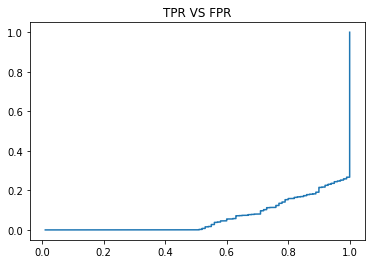

In [11]:
import matplotlib.pyplot as plt

# Plotting TPR and FPR
plt.plot(tpr,fpr)
plt.title('TPR VS FPR')
plt.show()

In [14]:
tpr.sort()
fpr.sort()
print(np.trapz(tpr,fpr))

0.9377570000000001


<font color='red'><b>C.</b></font> Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data <strong>5_c.csv</strong>
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

In [10]:
# write your code
data = pd.read_csv('5_c.csv')
data.shape

(2852, 2)

In [11]:
n = 10

Threshold_values = set(data['prob'].tolist())
Threshold_values = sorted(Threshold_values)

FP = []
FN = []

for thres in tqdm(Threshold_values):
    FP.append(len(data[(np.where(data['prob']<thres, 0, 1)==1) & (data['y']==0)]))
    FN.append(len(data[(np.where(data['prob']<thres, 0, 1)==0) & (data['y']==1)]))

100%|██████████| 2791/2791 [00:09<00:00, 281.21it/s]


In [12]:
for thres in tqdm(Threshold_values):
    new_roc = 500*FN[Threshold_values.index(thres)] + 100*FP[Threshold_values.index(thres)]

    if Threshold_values.index(thres) == 0:
        roc = new_roc 
    elif new_roc < roc:
        roc = new_roc
        best_thres = thres
print('ROC: {} for Thres:{}'.format(roc,best_thres))

100%|██████████| 2791/2791 [00:00<00:00, 8208.81it/s] 


ROC: 141000 for Thres:0.2300390278970873


<pre>
<font color='red'><b>D.</b></font> Compute performance metrics(for regression) for the given data <strong>5_d.csv</strong>
    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

In [13]:
from math import pow
from tqdm import tqdm

In [14]:
data = pd.read_csv('5_d.csv')
N = len(data)
mse = 0
mape = 0
SS_res = 0
SS_tot = 0
y_mean = np.mean(data['y'])
# print(y_mean)
# len(data)
data.head()
# print(data.shape)
for i in tqdm(range(0,N)):
#     print(data.iloc[i,0])
#     print(data.iloc[i,1])
#     print(i)
    SS_res += pow((data.iloc[i,0]-data.iloc[i,1]), 2)
    SS_tot += pow((data.iloc[i,0]-y_mean), 2)
    mape += abs(data.iloc[i,0]-data.iloc[i,1])*100/(N*np.mean(data['y']))

RR_2 = 1- SS_res/SS_tot
mse = SS_res/N
print('SS_res: {} SS_tot:{}'.format(SS_res,SS_tot))
print('MSE: {} :  MAPE:{} : RR_2:{}'.format(mse,mape,RR_2))

100%|██████████| 157200/157200 [01:09<00:00, 2263.98it/s]


SS_res: 27850448.0 SS_tot:638161080.035662
MSE: 177.16569974554707 :  MAPE:12.912029940108486 : RR_2:0.9563582786990964
